<a href="https://colab.research.google.com/github/kikiru328/practice_code/blob/main/Trial2_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load ( complete )

# DATALOAD

In [ ]:
# module import
import shutil
import os

# shutil.copy('/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/subsampling_data.zip','')
# shutil.unpack_archive('/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/subsampling_data.zip' , '/content/dataset')

# MASK BINARY?

In [ ]:
# module import
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

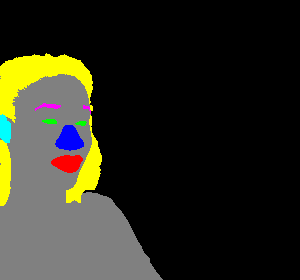

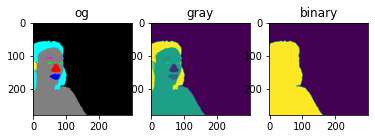

In [ ]:
mask = cv2.imread('/content/dataset/dataset/subsamples/masks/female03_headrende0009.png')
cv2_imshow(mask)
plt.subplot(131)
plt.title('og')
plt.imshow(mask)

plt.subplot(132)
plt.title('gray')
gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

plt.subplot(133)
plt.title('binary')
ret, th = cv2.threshold(gray, 0,11, cv2.THRESH_BINARY)
plt.imshow(th)

In [ ]:
!mkdir '/content/dataset/dataset/subsamples/gray_mask'

In [ ]:
# !rm -r '/content/dataset/dataset/subsamples/gray_mask'

In [ ]:
mask_list_path = '/content/dataset/dataset/subsamples/masks'
gray_mask_save_path = '/content/dataset/dataset/subsamples/gray_mask'
from glob import glob
import os
mask_list = glob(mask_list_path+'/*')
from tqdm import tqdm
error = []
for mask in tqdm(mask_list):
    try:
        m = cv2.imread(mask)
        m_ = cv2.cvtColor(m, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f'{gray_mask_save_path}/{os.path.basename(mask)}', m_)
    except Exception as e:
        print(e)
        error.append(mask)
        
print('\n',len(error))

100%|██████████| 2103/2103 [00:02<00:00, 1044.43it/s]


 0


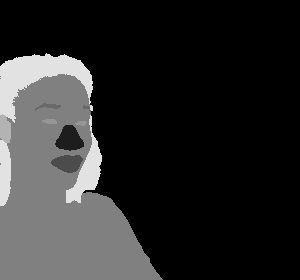

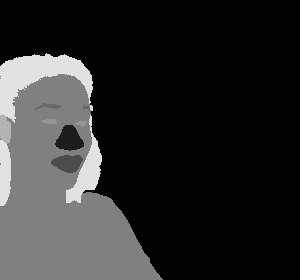

(280, 300)


In [ ]:
gray = cv2.imread('/content/dataset/dataset/subsamples/gray_mask/female03_headrende0009.png')
cv2_imshow(gray)
gray.shape
gray_ = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_)
print(gray_.shape)

In [ ]:
!mkdir '/content/dataset/dataset/subsamples/binary_mask'

In [ ]:
save_path = '/content/dataset/dataset/subsamples/binary_mask'
gray_mask_list = glob('/content/dataset/dataset/subsamples/gray_mask/*')
error = []
for gray in tqdm(gray_mask_list):
    try:
        gray_og = cv2.imread(gray)
        gray_ = cv2.cvtColor(gray_og, cv2.COLOR_BGR2GRAY)
        ret, th = cv2.threshold(gray_, 0,11, cv2.THRESH_BINARY)
        cv2.imwrite(f'{save_path}/{os.path.basename(gray)}', th)
        bin = cv2.imread(f'{save_path}/{os.path.basename(gray)}')
        bin_ = cv2.cvtColor(bin, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f'{save_path}/{os.path.basename(gray)}', bin_)
    except Exception as e:
        print(e)
        error.append(gray)

100%|██████████| 2103/2103 [00:03<00:00, 650.20it/s]


In [ ]:


# import numpy as np
# background = np.array([ 0,0,0 ])
# Lips = np.array([ 255,0,0 ])
# Eyes = np.array([ 0,255,0 ])
# Nose = np.array([ 0,0,255 ])
# face = np.array([ 128,128,128 ])
# hair = np.array([ 255,255,0 ])
# eyebrows = np.array([ 255,0,255 ])
# ears = np.array([ 0,255,255 ])
# teeth = np.array([ 255,255,255 ])
# facial = np.array([ 255,192,192 ])
# specs = np.array([ 0,128,128 ])





# mask = cv2.imread('/content/dataset/dataset/subsamples/masks/female03_headrende0009.png')
# mask_ = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
# im = mask.copy()
# im_ = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# # background = np.array([ 0,0,0 ])
# Lips = ( 255,0,0 )
# Eyes = ( 0,255,0 )
# Nose = ( 0,0,255 )
# face = ( 128,128,128 )
# hair = ( 255,255,0 )
# eyebrows = ( 255,0,255 )
# ears = ( 0,255,255 )
# teeth = ( 255,255,255 )
# facial = ( 255,192,192 )
# specs = ( 0,128,128 )

# plt.figure(figsize=(15,15))
# plt.subplot(121)
# plt.imshow(mask)

# im_[np.all(im == Lips, axis=-1)] = (1,1,1) #lips
# im_[np.all(im == Eyes, axis=-1)] = (2,2,2) #eyes
# im_[np.all(im == Nose, axis=-1)] = (3,3,3) #nose
# im_[np.all(im == face, axis=-1)] = (4,4,4) #face
# im_[np.all(im == hair, axis=-1)] = (5,5,5) #hair
# im_[np.all(im == eyebrows, axis=-1)] = (6,7,6) #eyebrows
# im_[np.all(im == ears, axis=-1)] = (7,7,7) #ears
# im_[np.all(im == teeth, axis=-1)] = (8,8,8) #teeth
# im_[np.all(im == facial, axis=-1)] = (9,9,9) #facial
# im_[np.all(im == specs, axis=-1)] = (10,10,10) #specs

# plt.subplot(122)
# plt.imshow(im_)

# RGB mask to single channel mask for multiclass segmentation 

In [ ]:
# module import

import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm

""" create Directory """

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
def process_mask(rgb_mask, colormap):
    output_mask = []

    for i, color in enumerate(colormap):
        cmap = np.all(np.equal(rgb_mask, color), axis=-1)
        output_mask.append(cmap)

    output_mask = np.stack(output_mask, axis=-1)
    return output_mask



if __name__ == "__main__" :
    """ create Directory """
    create_dir("/content/dataset/dataset/subsamples/single_mask")
    masks = glob('/content/dataset/dataset/subsamples/masks/*')

    VOC_COLORMAP = [
                    [0,0,0],
                    [255,0,0],[0,255,0],[0,0,255],
                    [128,128,128],
                    [255,255,0],[255,0,255],[0,255,255],[255,255,255],
                    [255,192,192], [0,128,128]
    ]

    VOC_CLASSES = list('background lips eyes nose face hair eyebrows ears teeth facial specs'.split(' '))

    # for name, color in zip(VOC_CLASSES, VOC_COLORMAP):
    #     print(f'{name} - {color}')


    for x in tqdm(masks, total=len(masks)):
        name = os.path.basename(x)
        # print(name)

        mask = cv2.imread(x, cv2.IMREAD_COLOR)
        mask = cv2.resize(mask, (256,256))

        processed_mask = process_mask(mask, VOC_COLORMAP)
        grayscale_mask = np.argmax(processed_mask, axis=-1)
        # print(np.unique(grayscale_mask))
        # print(processed_mask.shape)
        cv2.imwrite(f'/content/dataset/dataset/subsamples/single_mask/{name}',grayscale_mask)

100%|██████████| 2103/2103 [00:44<00:00, 46.97it/s]


[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


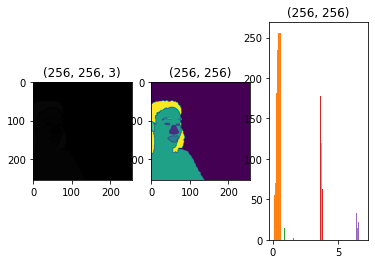

In [ ]:
mask = cv2.imread('/content/dataset/dataset/subsamples/single_mask/female03_headrende0009.png')
plt.subplot(131)
plt.imshow(mask)
plt.title(mask.shape)

plt.subplot(132)
mask_ = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
plt.imshow(mask_)
plt.title(mask_.shape)

plt.subplot(133)
plt.hist(mask_)
plt.title(mask_.shape)

print(np.unique(mask))
print(np.unique(mask_))

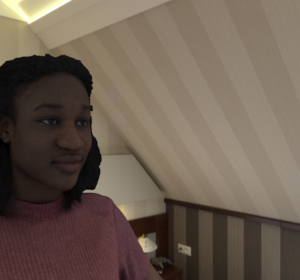

In [ ]:
img = cv2.imread('/content/dataset/dataset/subsamples/images/female03_headrende0009.png')
cv2_imshow(img)

In [ ]:
# !mkdir '/content/dataset/dataset/subsamples/resized_img'
# !rmdir '/content/dataset/dataset/subsamples/resized_img'

In [ ]:
shutil.copytree('/content/dataset/dataset/subsamples/images','/content/dataset/dataset/subsamples/resized_img')

'/content/dataset/dataset/subsamples/resized_img'

In [ ]:
img_list = glob('/content/dataset/dataset/subsamples/resized_img/*')
error = []
nope = []
for img in tqdm(img_list):
    try:
        img_ = cv2.imread(img)
        if img_.shape != (256,256,3):
            nope.append(img)
        else:
            pass
    except Exception as e:
        error.append(img)

100%|██████████| 2103/2103 [00:03<00:00, 554.08it/s]


In [ ]:
print(len(error))
print(len(nope))

0
431


In [ ]:
os.path.split(img)

('/content/dataset/dataset/subsamples/resized_img',
 'real_image50630.jpg_RESAMPLED_f8b1e109a03a3c50_scaled.png')

In [ ]:
error = []
# nope = []
for img in tqdm(nope):
    try:
        img_ = cv2.imread(img)
        re_img = cv2.resize(img_, (256,256))
        # print(re_img.shape)
        cv2.imwrite(img, re_img)
    except Exception as e:
        error.append(img)

100%|██████████| 431/431 [00:02<00:00, 164.48it/s]


In [ ]:
img_list = glob('/content/dataset/dataset/subsamples/resized_img/*')
error = []
nope = []
for img in tqdm(img_list):
    try:
        img_ = cv2.imread(img)
        if img_.shape != (256,256,3):
            nope.append(img)
        else:
            pass
    except Exception as e:
        error.append(img)

100%|██████████| 2103/2103 [00:03<00:00, 579.07it/s]


In [ ]:
print(len(error))
print(len(nope))

0
0


# RE DATA LOAD 

In [ ]:
import shutil
# shutil.copytree('/content/dataset/dataset/subsamples','/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/REAL_SUB')
shutil.unpack_archive('/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/REAL_SUB.zip','/content/dataset/dataset/subsamples')

# UNET MODEL

In [ ]:
# module import
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose,BatchNormalization, Dropout, Lambda

In [ ]:
def multi_unet_model(n_classes=11, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

# TRAIN

In [ ]:
# module import
import tensorflow as tf
import keras
from tensorflow.keras.utils import normalize
# from keras.utils import normalize
import os
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
SIZE_X = 256
SIZE_Y = 256
n_classes = 11

train_images = []
for i in glob('/content/dataset/dataset/subsamples/resized_img/*'):
    img = cv2.imread(i,0)
    train_images .append(img)

train_images = np.array(train_images)

In [ ]:
train_masks = []
for i in glob('/content/dataset/dataset/subsamples/single_mask/*'):
    mask = cv2.imread(i,0)
    mask = cv2.resize(mask, (256,256))    
    train_masks.append(mask)
train_masks = np.array(train_masks)

In [ ]:
mask.shape

(256, 256)

In [ ]:
train_masks.shape

(2103, 256, 256)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_images =  np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

In [ ]:
np.unique(train_masks_encoded_original_shape)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [ ]:
train_masks_input.shape

(2103, 256, 256, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

In [ ]:
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [ ]:
print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

Class values in the dataset are ...  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

In [ ]:
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

# WEIGHT

In [ ]:
y_train_cat.shape
y_test_cat.shape

(211, 256, 256, 11)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = np.unique(train_masks_reshaped_encoded),
                                                 y=train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)
# type(class_weights)

Class weights are...: [1.47515465e-01 1.06245920e+01 4.01310916e+01 2.82795755e+01
 5.43250164e-01 1.87143504e+01 4.22500530e+01 8.74346229e-01
 1.97838493e+02 1.53135787e+05]


In [ ]:
weight = {i : class_weights[i] for i in range(11)}
weight

IndexError: ignored

In [ ]:
# class_weights = dict(zip(np.unique(train_masks_reshaped_encoded), class_weights))
# class_weights

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
print(IMG_HEIGHT)
print(IMG_WIDTH)
print(IMG_CHANNELS)

256
256
1


In [ ]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

# TRAINING

In [ ]:
model = get_model()
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

# Fitting

In [ ]:
import shutil
shutil.copy('/content/test.hdf5','/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/multiclass_unet_seg.hdf5')

'/content/drive/MyDrive/연습용코드본/Face_Segmentation/Trial(12)/multiclass_unet_seg.hdf5'

In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 4,
                    verbose = 1,
                    epochs = 200,
                    # class_weight = class_weights,
                    validation_data = (X_test, y_test_cat),
                    shuffle=False)

model.save('/content/test.hdf5')

_, acc = model.evaluate(X_test, y_test_cat)
print("acc >  ", (acc * 100.0), "%")

KeyboardInterrupt: ignored

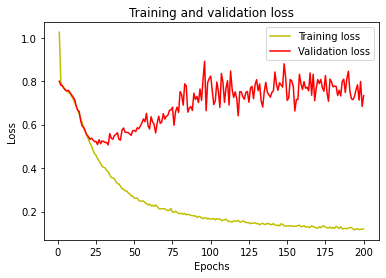

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


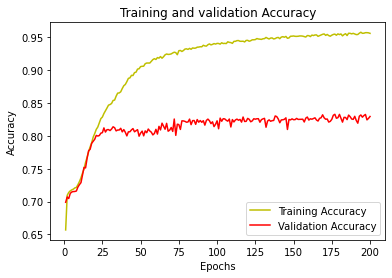

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Inference

In [ ]:
model.load_weights('/content/test.hdf5')


In [ ]:

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

##################################################

#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 11
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.44000214


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


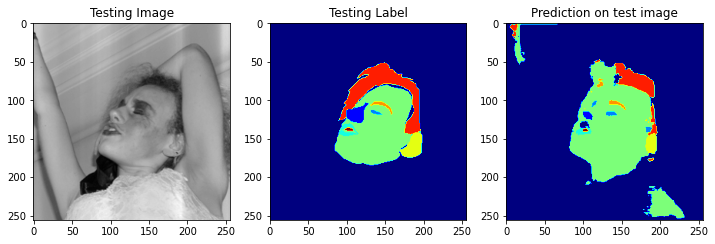

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

In [ ]:
!pip install patchify

0 0


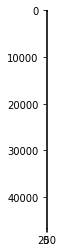

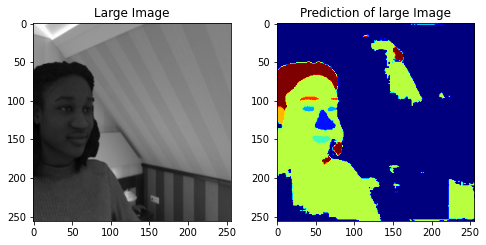

In [ ]:

from patchify import patchify, unpatchify

large_image = cv2.imread('/content/dataset/dataset/subsamples/resized_img/female03_headrende0009.png', 0)
#This will split the image into small images of shape [3,3]
patches = patchify(large_image, (256, 256), step=256)  #Step=256 for 256 patches means no overlap

predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)
        
        single_patch = patches[i,j,:,:]       
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)
        single_patch_prediction = (model.predict(single_patch_input))
        single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

predicted_patches = np.array(predicted_patches)

predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 256,256) )

reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)
plt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')

plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()